In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install detectron2

In [2]:
cd /content/drive/My Drive/Colab Notebooks/mask_rcnn_for car/detectron

/content/drive/My Drive/Colab Notebooks/mask_rcnn_for car/detectron


In [3]:
# # install dependencies: 
# !pip install pyyaml==5.1 pycocotools>=2.0.1
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # opencv is pre-installed on colab

In [4]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# assert torch.__version__.startswith("1.6")
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

In [5]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import tensorflow as tf
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

In [6]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
from matplotlib import pyplot as plt
from scipy import ndimage

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [7]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)


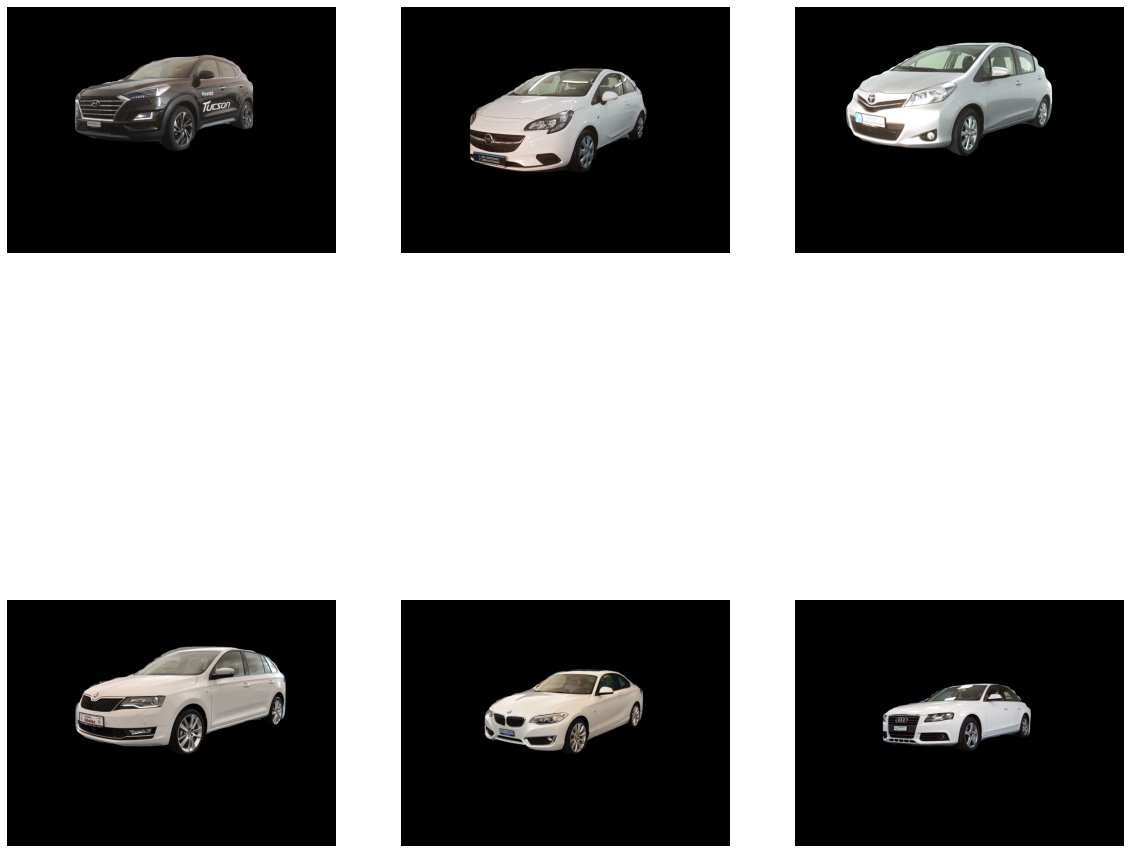

In [13]:
k =0
fig= plt.figure(figsize=(20, 20))

output_file_path = "output_files"
for i in range(len(os.listdir("input_files"))):
    file = "input_files/"+os.listdir("input_files")[i]
    # print(file)
    im = cv2.imread(file)
    outputs = predictor(im)

    image = []
    score = []

    mask = outputs["instances"].pred_masks.cpu().numpy()

    for masking in range(outputs["instances"].pred_masks.shape[0]):
      im = cv2.imread(file)
      if outputs["instances"].pred_classes[masking] ==2:
        for j in range(3):
          im[:,:,j] = im[:,:,j] * mask[masking,:,:]

        image.append(im)
        score.append(sum(im.flatten()))
    
    plt.subplot(2,3 ,k+1)
    output = image[np.argmax(np.array(score))]
    plt.imshow(output)
    cv2.imwrite(os.path.join(output_file_path,os.listdir("input_files")[i]), output)
    k =k+1
    plt.axis("off")